# Importing Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Importing the dataset as DataFrame and Data exploration 

In [4]:
df = pd.read_csv("thyroidDF.csv")

In [5]:
df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


In [6]:
# Total number of rows and columns
row, columns = df.shape
print(f'Total number of rows: {row}')
print(f'Total number of columns: {columns}')

Total number of rows: 9172
Total number of columns: 31


In [7]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [8]:
# Total number of missing values in each column
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

The “Thyroid Disease Data” UCI Machine Learning dataset contains 9,172 rows and 31 columns, with no duplicate values. However, there are significant number of missing values in the columns: Sex, TSH, T3, TT4, T4U, FTI, and TBG, with TBG column leading with 8823 null entries. 

In [10]:
# Unique values in 'sex' column
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [11]:
# Counting the frequency of each distinct value in the 'sex' column
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [12]:
# Unique values in 'TSH_measured' column
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [13]:
# Filtering the unique values in the 'TSH' column for rows where 'TSH_measured' is not measured to find the erroneous data. 
df['TSH'][df['TSH_measured'] == 'f'].unique()

array([nan])

In [14]:
# Counting the number of missing TSH values for patients where TSH was not measured
df['TSH'][df['TSH_measured'] == 'f'].isnull().sum()

842

In [15]:
# Counting of missing values in TSH
df['TSH'].isnull().sum()

842

The dataset has no erroneous data related to the TSH measurements. The data marked with 'f' in 'TSH_measured' has no corresponding values in 'TSH' column which is correct. 

In [17]:
# Unique values in 'T3_measured' column
df['T3_measured'].unique()

array(['f', 't'], dtype=object)

In [18]:
# Filtering the unique values in the 'T3' column for rows where 'T3_measured' is 'f' to validate the data. 
df['T3'][df['T3_measured'] == 'f'].unique()

array([nan])

In [19]:
# Counting the number of missing T3 values for patients where T3 was not measured
df['T3'][df['T3_measured'] == 'f'].isnull().sum()

2604

In [20]:
# Counting of missing values in T3
df['T3'].isnull().sum()

2604

Similarly, the dataset has no erroneous data related to the T3 measurements. The data marked with 'f' in 'T3_measured' has no corresponding values in 'T3' column which is correct. 

In [22]:
# Unique values in 'TT4_measured' column
df['TT4_measured'].unique()

array(['f', 't'], dtype=object)

In [23]:
# Filtering distinct values in the 'TT4' column for rows where 'TT4_measured' is 'f' 
df['TT4'][df['TT4_measured'] == 'f'].unique()

array([nan])

In [24]:
# Counts the number of missing TT4 values for patients where TT4 was not measured
df['TT4'][df['TT4_measured'] == 'f'].isnull().sum()

442

In [25]:
# Count of missing values in TT4
df['TT4'].isnull().sum()

442

Similarly, the dataset has no erroneous data related to the TT4 measurements. The data marked with 'f' in 'TT4_measured' has no corresponding values in 'TT4' column which is correct. 

In [27]:
# Unique values in 'T4U_measured' column
df['T4U_measured'].unique()

array(['f', 't'], dtype=object)

In [28]:
# Filtering the unique values 'T4U' column for rows where 'T4U_measured' is 'f'
df['T4U'][df['T4U_measured'] == 'f'].unique()

array([nan])

In [29]:
# Counting the number of missing T4U values for patients where T4U was not measured
df['T4U'][df['T4U_measured'] == 'f'].isnull().sum()

809

In [30]:
# Counting of missing values in T4U
df['T4U'].isnull().sum()

809

Similarly, the dataset has no erroneous data related to the T4U measurements. The data marked with 'f' in 'T4U_measured' has no corresponding values in 'T4U' column which is correct. 

In [32]:
# Unique values in 'FTI_measured' column
df['FTI_measured'].unique()

array(['f', 't'], dtype=object)

In [33]:
# Extracting the unique values in the 'FTI' column for rows where 'FTI_measured' is 'f'
df['FTI'][df['FTI_measured'] == 'f'].unique()

array([nan])

In [34]:
# Counting the number of missing FTI values for patients where FTI was not measured
df['FTI'][df['FTI_measured'] == 'f'].isnull().sum()

802

In [35]:
# Counting of missing values in FTI
df['FTI'].isnull().sum()

802

Similarly, the dataset has no erroneous data related to the FTI measurements. The data marked with 'f' in 'FTI_measured' has no corresponding values in 'FTI' column which is correct. 

In [37]:
# Unique values in 'TBG_measured' column
df['TBG_measured'].unique()

array(['f', 't'], dtype=object)

In [38]:
# Filtering the distinct values in the 'TBG' column for rows where 'TBG_measured' is 'f'
df['TBG'][df['TBG_measured'] == 'f'].unique()

array([nan])

In [39]:
# Counting the number of missing TBG values for patients where TBG was not measured
df['TBG'][df['TBG_measured'] == 'f'].isnull().sum()

8823

In [40]:
# Counting of missing values in TBG
df['TBG'].isnull().sum()

8823

Similarly, the dataset has no erroneous data related to the TBG measurements. The data marked with 'f' in 'TBG_measured' has no corresponding values in 'TBG' column which is correct. 

**Conclusion:** 

Based on analysis, the dataset has no error entries in TSH, T3, TT4, T4U, FTI, and TBG measurements as null values in the TSH, T3, TT4, T4U, FTI, and TBG columns has corresponding TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured, and TBG_measured values with the 'f' values. For the patients where the test were not taken, there is no measured value or data. 

# Feature Engineering

In [44]:
# Unique classes in 'target' column
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

**Diagnosis**

The diagnosis data can be categorized into 8 large classes: 

1. Hyperthyroid conditions: A-hyperthyroid, B - T3 toxic, C - toxic goitre, D - secondary toxic
2. Hypothyroid conditions:  E - hypothyroid, F - primary hypothyroid, G - compensated hypothyroid, H - secondary hypothyroid
3. Binding Protein: I - Increased binding protein, J - Decreased binding protein
4. General health condition: K - Concurrent non-thyroidal illness
5. Replacement Therapy: L - Consistent with replacement therapy, M - Underreplaced, N - Overreplaced
6. Antithyroid Treatment: O - Antithyroid drugs, P - I131 treatment, Q - Surgery
7. Miscellaneous: R - Discordant assay results, S - Elevated TBG, T - Elevated thyroid hormones
8. Normal condition: '-' (without disease)

The diagnosis in the form of  "X|Y" is interpreted as "consistent with X, but more likely Y". 

The class R was skipped. Discordant assay results


In [46]:
# Defining  diagnosis groups 

hyperthyroid_conditions = ['A', 'B', 'C', 'D']  #Hyperthyroid
hypothyroid_conditions = ['E', 'F', 'G', 'H'] #Hypothyroid
replacement_therapy = ['L', 'M', 'N'] #Related to synthetic hormone use
non_thyroidal_illness  = ['I', 'J', 'K', 'S', 'T']	#Indirect or related issues
under_treatment = ['O', 'P', 'Q'] #Due to the interventions
normal_conditions = ['-'] #Negative

# Mapping logic
def categorize_target(value):
    diagnoses = value.split('|')
    
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'
        if diagnosis in replacement_therapy:
            return 'Replacement Therapy'
        if diagnosis in non_thyroidal_illness:
            return 'Non-thyroidal Illness'
        if diagnosis in under_treatment:
            return 'Treatment Effect'
        if diagnosis in normal_conditions:
            return 'Negative'
    
# Apply the categorization to DataFrame
df['target'] = df['target'].apply(categorize_target)

In [47]:
#Unique Classes in 'target' column
df['target'].unique()

array(['Negative', 'Non-thyroidal Illness', 'Hypothyroid', None,
       'Replacement Therapy', 'Hyperthyroid', 'Treatment Effect'],
      dtype=object)

In [48]:
#  Counting the frequency of each unique classes in the 'target' column
df['target'].value_counts()

target
Negative                 6771
Non-thyroidal Illness     897
Hypothyroid               601
Replacement Therapy       336
Hyperthyroid              195
Treatment Effect           33
Name: count, dtype: int64

This means that the dataset is highly imbalanced and this issue will be addressed in further steps

In [50]:
# Counting the missing values in 'target' column
df['target'].isnull().sum()

339

## Data Cleaning
The missing values were handled using appropriate imputation method: 

1. Columns with missed 'target' value were dropped. 
2. Missing values in the 'Sex' column were imputed using the mode of the column.
3. Missing values in TSH, T3, TT4, T4U were imputed with the median of the respective columns.
4. The TBG column was dropped entirely due a notable number of null entries in it, particularly, 8823 null values.

Additionaly 
FTI were dropped


In [52]:
df = df.dropna(subset=['target'])

In [53]:
# Imputing the missing values in 'sex' column with mode which is 'F' - Female 
sex_mode = df['sex'].mode()[0]
sex_mode

'F'

In [54]:
df['sex'] = df['sex'].fillna(sex_mode)
df['sex'].isna().sum()

0

In [55]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

Additional to the 'TBG' column, the columns 'referral_source' ,'patient_id' were dropped as they do not contribute to the analysis and prediction. 

In [57]:
# List of columns that were dropped
col_to_drop = ['TBG', 'TBG_measured', 'patient_id', 'referral_source']

In [58]:
# Dropping the columns in the 'col_to_drop' list 
df.drop(col_to_drop, axis = 1, inplace = True)

In [59]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'target'],
      dtype='object')

In [60]:
# List of columns still containing missing values
col_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [61]:
# Correlating the columns in 'col_with_null' to find the suitable imputation method and finding if the column should be kept  
correlation_matrix = df[col_with_null].corr()
print(correlation_matrix)

          TSH        T3       TT4       T4U       FTI
TSH  1.000000 -0.155049 -0.280236  0.077200 -0.302004
T3  -0.155049  1.000000  0.577729  0.338405  0.440449
TT4 -0.280236  0.577729  1.000000  0.395320  0.771954
T4U  0.077200  0.338405  0.395320  1.000000 -0.205955
FTI -0.302004  0.440449  0.771954 -0.205955  1.000000


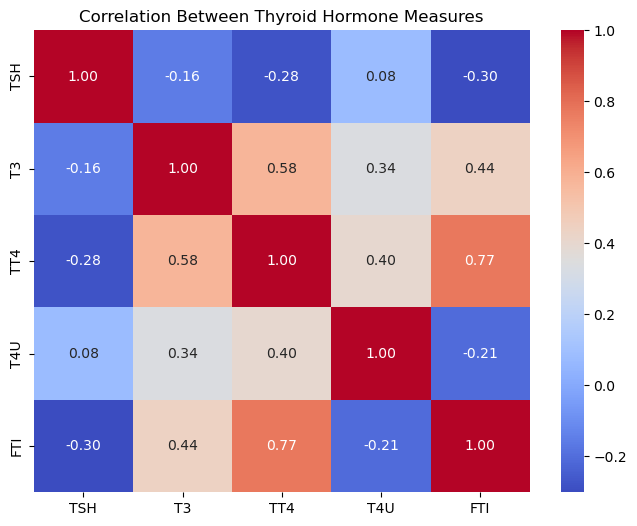

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Thyroid Hormone Measures')
plt.show()


Based on correlation matrix, we found that there are strong correlations between 'TT4' and 'FTI' columns (75%), and moderate correlation between the columns 'T3' and 'TT4' (56%) , 'TT4' and 'T4U' (37%), 'T3' and 'FTI' (39%) columns. 

Columns that have weak/moderate correlation with other columns are TSH, T3, T4U, these columns should be kept in. 

Columns 'TT4' and 'FTI' have strong correlation score of 75%. In most cases, FTI is calculated from devision of TT4 by T4U, therefore, the column 'FTI' is dependent column, it can be dropped. 


In [64]:
df.drop(['FTI', 'FTI_measured'], axis=1, inplace=True)

In [65]:
df.isna().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     839
T3_measured               0
T3                     2580
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     798
target                    0
dtype: int64

In [66]:
# Unique values in the columns with 'object' data type
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in TSH_measured: ['t' 'f']
Unique values in T3_measured: ['f' 't']
Unique values in TT4_measured: ['f' 't']
Unique values in T4U_measured: ['f' 't']
Unique values in target: ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Replacement Therapy'
 'Hyperthyroid' 'Treatment Effect']


In [67]:
#Shape of df
df.shape

(8833, 25)

In [68]:
#Unique values in 'age' column
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    71,
          67,    55,    61,    46,    44,    82,    64,    70,    33,
          59,    53,    52,    49,    35,    48,    27,    69,    76,
          73,    68,    66,    30,    88,    58,    21,    38,    45,
          83,    62,    25,    86,    75,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
          91,     5,    94,     7,     4, 65511,    95, 65512,     3,
       65526])

There are some discrepencies in the 'age' column. It is containing values like 455, 65511, 65512, and 65526 which indicates to the inconsistent data points.

In [70]:
# Filtering the values in 'age' column 
df = df[df['age'] <= 100]

# Unique values in 'age' column
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       71, 67, 55, 61, 46, 44, 82, 64, 70, 33, 59, 53, 52, 49, 35, 48, 27,
       69, 76, 73, 68, 66, 30, 88, 58, 21, 38, 45, 83, 62, 25, 86, 75, 72,
       14, 15, 39, 26, 20, 80, 90, 23, 18, 13, 78, 24, 81, 92, 57, 74,  9,
       47, 17, 11, 50, 34,  8, 79, 31, 65, 84, 12, 10, 19, 22,  1,  2, 97,
        6, 89, 87, 93, 91,  5, 94,  7,  4, 95,  3])

In [71]:
df.shape

(8829, 25)

In [72]:
# Checking whether data has any anomalies where patient is male but have 'true' in 'pregnant' column
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,target


There are no instances in the dataset where a "Male" is marked as "pregnant." This is a logical result and validates the integrity of the data for this specific condition. In such cases, we can infer that:

* The dataset does not contain biologically implausible entries for this scenario.
* The data aligns with expected real-world constraints (assuming there are no labeling or data entry errors).

Checking the lab data for the outliers and possible errors. 

In [75]:
print(df[['TSH', 'T3', 'TT4', 'T4U']].describe())

               TSH           T3          TT4          T4U
count  7990.000000  6250.000000  8387.000000  8031.000000
mean      5.149526     1.983614   107.767576     0.980367
std      24.439711     0.886775    36.828901     0.198609
min       0.005000     0.050000     2.000000     0.170000
25%       0.492500     1.500000    87.000000     0.860000
50%       1.400000     1.900000   104.000000     0.960000
75%       2.700000     2.300000   124.000000     1.070000
max     530.000000    18.000000   600.000000     2.330000


Expected Range of the TSH : 0.4–4.0 mIU/L (clinical guidelines).
Min: 0.005 (extreme hyperthyroidism)
Max: 530 (severe hypothyroidism or measurement error)
TSH column is Highly skewed. 

Outliers:
Lower: Values < 0.01 (unlikely physiologically).
Upper: Values > 50 (rare but possible in myxedema coma).


Based on clinical guidelines expected range of the T3: 0.8–2.0 ng/mL.
Min: 0.05 (unrealistically low)
Max: 18 (likely lab error)
Mix and max indicate possible outliers or errors.

Outliers:
Upper: T3 > 5 (almost always erroneous).


Expected Range for TT4: 4.5–12.5 μg/dL.
Min: 2 (too low for survival)
Max: 600 (lab error or binding protein disorder)
Extreme outlier in max and min values. 

Outliers:
Upper: TT4 > 30 (requires validation).

Expected Range of the T4U measure: 0.7–1.3 (lab-dependent).
Min: 0.17 (too low)
Max: 2.33 (too high)

Outliers:
Values < 0.5 or > 1.5 likely erroneous. 


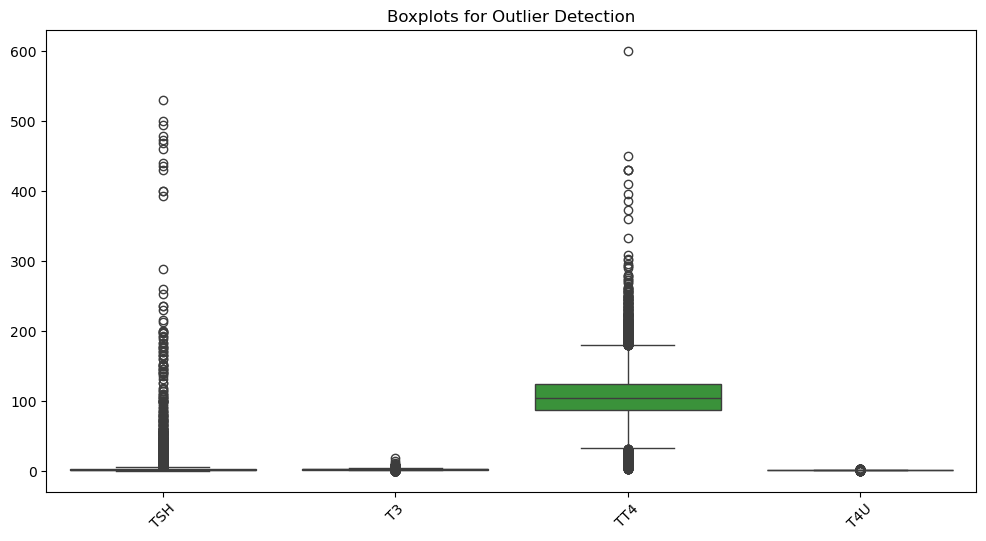

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['TSH', 'T3', 'TT4', 'T4U']])
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

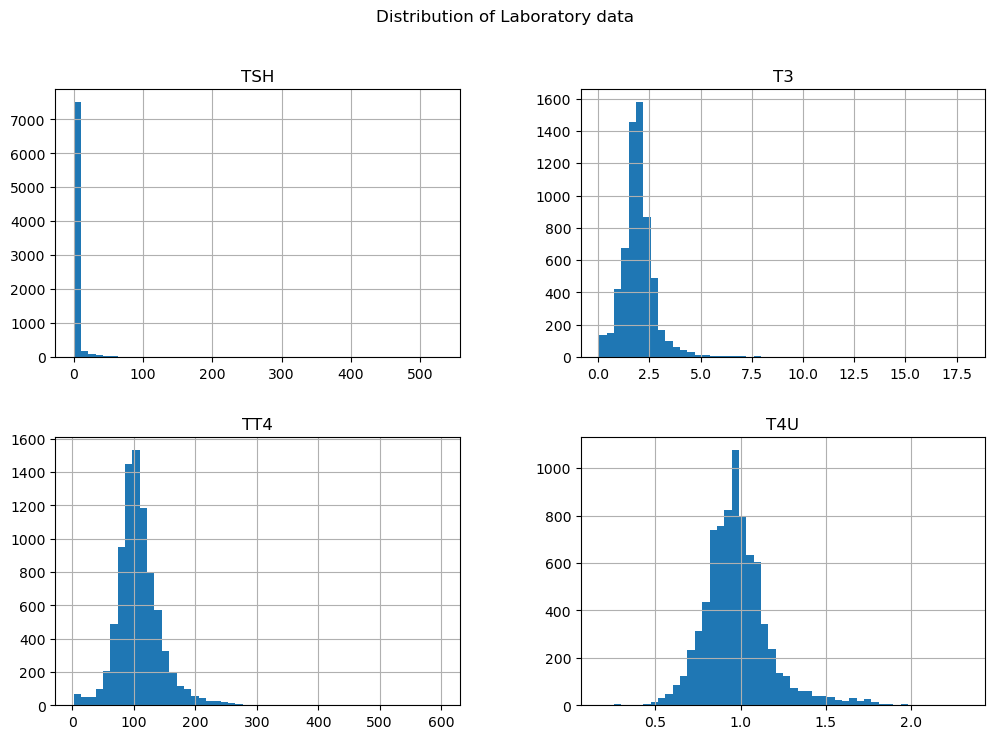

In [78]:
df[['TSH', 'T3', 'TT4', 'T4U']].hist(bins=50, figsize=(12, 8))
plt.suptitle("Distribution of Laboratory data")
plt.show()

Artifacts/Lab Errors:

TSH = 0.000 (technically impossible; assay detection limits typically ~0.01 mIU/L).
TSH > 500 mIU/L (extremely rare outside lab errors or sample contamination).


T3 < 0.2 ng/mL (incompatible with life).
T3 > 10 ng/mL (likely lab error).

TT4< 2 μg/dL (lab error or critical illness).
TT4> 30 μg/dL (unless TBG is extremely high).

T4U< 0.3 (likely lab error)
T4U > 2.0 (likely lab error)


In [80]:
from sklearn.ensemble import IsolationForest

def isolation_forest_outliers_with_target(df, features, target_column, contamination=0.01):
    # Remove rows with missing values in the specified columns
    df_clean = df[features].dropna()
    
    # Initialize Isolation Forest with the specified contamination rate
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    
    # Fit the model and predict anomalies (-1 means outlier, 1 means normal)
    preds = iso_forest.fit_predict(df_clean)
    
    # Get the indices of the outliers
    outliers = df_clean.index[preds == -1]
    
    # Return the outliers and their corresponding target values from the original dataframe
    outlier_df = df.loc[outliers]
    outlier_df_with_target = outlier_df[[*features, target_column]]
    
    return outlier_df_with_target

# Example usage with specific columns and target
outliers_with_target = isolation_forest_outliers_with_target(df, ['TSH', 'T3', 'TT4', 'T4U'], 'target')

# Show outliers with their target values
print(outliers_with_target.to_string(index=False))


    TSH        T3   TT4  T4U                target
176.000  0.500000   6.0 1.45           Hypothyroid
 71.000  0.500000   4.0 1.27           Hypothyroid
170.000  0.300000  12.0 1.05           Hypothyroid
145.000  0.200000  16.0 0.94           Hypothyroid
430.000  0.400000   6.0 1.04           Hypothyroid
  0.100  8.599999 359.0 0.74          Hyperthyroid
213.000  0.900000  43.0 0.95           Hypothyroid
400.000  0.200000   4.0 1.00           Hypothyroid
260.000  0.050000   4.0 1.27           Hypothyroid
 53.000  0.400000   9.7 1.46           Hypothyroid
200.000  0.400000  10.0 1.19           Hypothyroid
125.000  0.200000  11.0 1.06           Hypothyroid
288.000  0.700000  14.0 1.13           Hypothyroid
 24.000  8.900000 218.0 0.83          Hyperthyroid
143.000  0.400000  15.0 0.98           Hypothyroid
235.000  0.500000   2.0 1.24           Hypothyroid
  0.100  4.100000 450.0 1.66   Replacement Therapy
  0.150  7.300000 430.0 1.09          Hyperthyroid
109.000  0.200000   3.0 1.02   

In [81]:
# Creating a copy of 'df' without any null values for data visualization
df1 = df.copy()

Final dataset size after cleaning 

In [83]:
df.shape

(8829, 25)

# Data Split

Splitting the dataset with stratification as the dataset is highly imbalanced. The dataset was splitted into Cross-validation set (85%) and the test set (15%). 

In [86]:
# Step 1: Separating features and target values
X = df.drop('target', axis=1)
y = df['target']

# Step 2: Spliting off the test set (15% of the total data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Output shapes
print(f"Train and validation (Cross-validation): {X_train.shape}, Test: {X_test.shape}")


Train and validation (Cross-validation): (7504, 24), Test: (1325, 24)


The class distribution for each set. 

In [88]:
# For training + validation data (used in cross-validation)
print("Class distribution in Train+Validation (CV set):")
print(y_train.value_counts(normalize=True).sort_index() * 100)  
print()

# For test data
print("Class distribution in Test set:")
print(y_test.value_counts(normalize=True).sort_index() * 100)  


Class distribution in Train+Validation (CV set):
target
Hyperthyroid              2.212154
Hypothyroid               6.809701
Negative                 76.639126
Non-thyroidal Illness    10.154584
Replacement Therapy       3.811301
Treatment Effect          0.373134
Name: proportion, dtype: float64

Class distribution in Test set:
target
Hyperthyroid              2.188679
Hypothyroid               6.792453
Negative                 76.679245
Non-thyroidal Illness    10.188679
Replacement Therapy       3.773585
Treatment Effect          0.377358
Name: proportion, dtype: float64


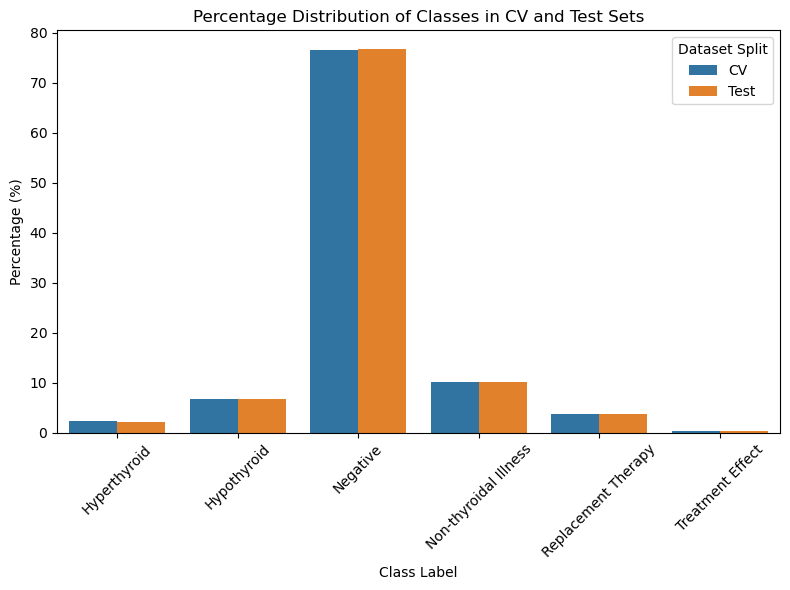

In [89]:
# Step 1: Compute percentages
train_percent = y_train.value_counts(normalize=True).sort_index() * 100
test_percent = y_test.value_counts(normalize=True).sort_index() * 100

# Step 2: Combine into a DataFrame for plotting
percent_df = pd.DataFrame({
    'Class': train_percent.index.tolist() + test_percent.index.tolist(),
    'Percentage': list(train_percent.values) + list(test_percent.values),
    'Split': ['CV'] * len(train_percent) + ['Test'] * len(test_percent)
})

# Step 3: Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=percent_df, x='Class', y='Percentage', hue='Split')
plt.title('Percentage Distribution of Classes in CV and Test Sets')
plt.ylabel('Percentage (%)')
plt.xlabel('Class Label')
plt.xticks(rotation=45)
plt.legend(title='Dataset Split')
plt.tight_layout()
plt.show()

As shown in the plot, all classes are distrubuted equally through training and testing sets

# Data imputing 

Adding data imputation to handle missing values in 'TSH', 'T3', 'TT4', 'T4U' columns. We are adding median values instead missed values. 
The imputation is being added into Train set, then validation and test sets were transformed for consistency.

In [93]:
# Impute missing values for numerical columns (TSH, T3, TT4, T4U)
num_cols = ['TSH', 'T3', 'TT4', 'T4U']

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data, then transform on test and validation
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Output the shapes to verify
print(f"Cross validation set: {X_train.shape}, Test: {X_test.shape}")

Cross validation set: (7504, 24), Test: (1325, 24)


# Data encoding 

In [95]:
# Check the unique data types for each column
print(df.dtypes)

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
target                  object
dtype: object


In [96]:
# Check the unique values for each categorical column
for col in df.columns:
    if df[col].dtype == 'object': 
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'sex': ['F' 'M']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_meds': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['t' 'f']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'TSH_measured': ['t' 'f']
Unique values in 'T3_measured': ['f' 't']
Unique values in 'TT4_measured': ['f' 't']
Unique values in 'T4U_measured': ['f' 't']
Unique values in 'target': ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Replacement Therapy'
 'Hyperthyroid' 'Treatment Effect']


1. Label encoding for binary values in columns 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'.
2. 'referral_source'
3. Label Encoding for the target variable


In [98]:
# Define LabelEncoder
le = LabelEncoder()

# Binary categorical columns
binary_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick',
               'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
               'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured' ]

# Apply Label Encoding for binary columns
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Ensure consistent column alignment across all sets
X_test_aligned, _ = X_test.align(X_train, join='left', axis=1, fill_value=0)

X_test = X_test_aligned

# Check the shapes after encoding
print(f"Train X shape: {X_train.shape}")
print(f"Test X shape: {X_test.shape}")

# Encode the target variable (y)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Check the shapes after encoding
print(f"Train y shape: {y_train.shape}")
print(f"Test y shape: {y_test.shape}")


Train X shape: (7504, 24)
Test X shape: (1325, 24)
Train y shape: (7504,)
Test y shape: (1325,)


The mapping of the target column 

In [100]:
label_mapping = {index: label for index, label in enumerate(le.classes_)}
print("Label Mapping:", label_mapping)


Label Mapping: {0: 'Hyperthyroid', 1: 'Hypothyroid', 2: 'Negative', 3: 'Non-thyroidal Illness', 4: 'Replacement Therapy', 5: 'Treatment Effect'}


# Data scaling 

Numeric columns in the dataset: ['age', 'TSH', 'T3', 'TT4', 'T4U']

In [103]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U']].describe())

               age          TSH           T3          TT4          T4U
count  7504.000000  7504.000000  7504.000000  7504.000000  7504.000000
mean     52.004398     4.929466     1.962086   107.566205     0.978575
std      18.789095    24.530984     0.753212    36.060385     0.190790
min       1.000000     0.005000     0.050000     2.000000     0.170000
25%      37.000000     0.600000     1.700000    88.000000     0.870000
50%      55.000000     1.400000     1.900000   104.000000     0.960000
75%      67.000000     2.500000     2.100000   123.000000     1.060000
max      97.000000   530.000000    18.000000   600.000000     2.330000


Scaling is necessary in all columns as they have widely different scales. 

In [105]:
# Features to scale
scale_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U']

# Initialize scaler
scaler = StandardScaler()

# Fit on training only and transform all
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# Check the shapes after scaling
print(f"Train X shape: {X_train.shape}")
print(f"Test X shape: {X_test.shape}")

# Check the shapes after scaling
print(f"Train y shape: {y_train.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (7504, 24)
Test X shape: (1325, 24)
Train y shape: (7504,)
Test y shape: (1325,)


The values of the numeric columns ['age', 'TSH', 'T3', 'TT4', 'T4U'] after scaling

In [107]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U']].describe())

                age           TSH            T3           TT4           T4U
count  7.504000e+03  7.504000e+03  7.504000e+03  7.504000e+03  7.504000e+03
mean  -1.259357e-16  3.503476e-17 -9.563542e-17 -3.380381e-16 -2.698623e-17
std    1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00
min   -2.714755e+00 -2.007581e-01 -2.538746e+00 -2.927679e+00 -4.238313e+00
25%   -7.986227e-01 -1.765015e-01 -3.479805e-01 -5.426317e-01 -5.691167e-01
50%    1.594437e-01 -1.438875e-01 -8.243325e-02 -9.890195e-02 -9.736280e-02
75%    7.981545e-01 -9.904324e-02  1.831140e-01  4.280271e-01  4.268082e-01
max    2.394932e+00  2.140581e+01  2.129412e+01  1.365672e+01  7.083779e+00


Plotting the class distribution of the target value in the train data set and showing the class distribution in percent. 

Class distribution (%):
2    76.64
3    10.15
1     6.81
4     3.81
0     2.21
5     0.37
Name: proportion, dtype: float64


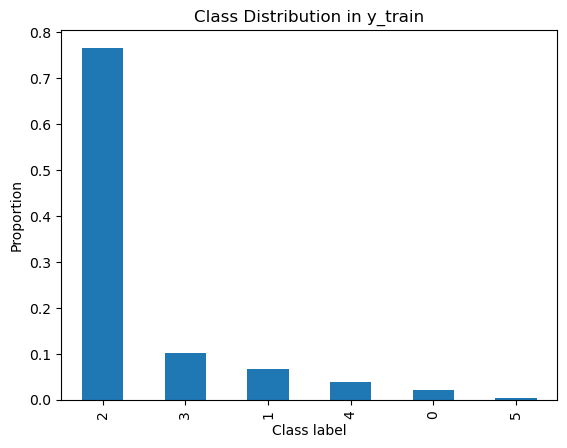

In [109]:
class_counts = pd.Series(y_train).value_counts(normalize=True)

print("Class distribution (%):")
print((class_counts * 100).round(2))

class_counts.plot(kind='bar', title='Class Distribution in y_train')
plt.ylabel('Proportion')
plt.xlabel('Class label')
plt.show()


The data is highly imbalanced as the classes 6, 1, 0 are underrepresented in target column compared to class 3 ('Negative'). Such imbalances are common in medical datasets as the number of healthy patient usually larger than the number of disease cases. 
The class imbalance is solved by: 
1. Tunning the hyperparameters of models. 
2. Resampling using SMOTE (upsampling underrepresented classes).

# Metrics 

Since the imbalance of the dataset the primary metrics used for the models performance evaluation are:
1. Macro F1 score 
2. Precision, recall metrics for each class 
3. Confusion matrix

write 

# Baseline models 

As a baseline 10 models were chosen: 
1. Logistic Regression
2. Random Forest 
3. XGBoost
4. LightGBM
5. CatBoost
6. Gradient Boosting
7. Decision Tree
8. K-Nearest Neighbors
9. Gaussian Naive Bayes 
10. Support Vector Machine

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

models = {}

# 1. Logistic Regression
models['Logistic Regression'] = LogisticRegression(
    max_iter=5000, multi_class='multinomial', class_weight='balanced', random_state=42)

# 2. Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42)

# 3. XGBoost
models['XGBoost'] = xgb.XGBClassifier(
    use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 4. LightGBM
models['LightGBM'] = lgb.LGBMClassifier(
    class_weight='balanced', random_state=42)

# 5. CatBoost
models['CatBoost'] = CatBoostClassifier(
    verbose=0, random_state=42, auto_class_weights='Balanced')

# 6. Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(
    random_state=42)

# 7. Decision Tree
models['Decision Tree'] = DecisionTreeClassifier(
    class_weight='balanced', random_state=42)

# 8. K-Nearest Neighbors
models['KNN'] = KNeighborsClassifier()

# 9. Gaussian Naive Bayes
models['Naive Bayes'] = GaussianNB()

# 10. Support Vector Machine
models['SVM'] = SVC(
    class_weight='balanced', probability=True, random_state=42)



Logistic Regression
              precision    recall  f1-score   support

           0       0.39      0.79      0.52        29
           1       0.77      0.90      0.83        90
           2       0.96      0.58      0.72      1016
           3       0.25      0.76      0.38       135
           4       0.39      0.94      0.55        50
           5       0.27      0.80      0.40         5

    accuracy                           0.64      1325
   macro avg       0.50      0.80      0.57      1325
weighted avg       0.84      0.64      0.68      1325

Balanced Accuracy: 0.7954


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


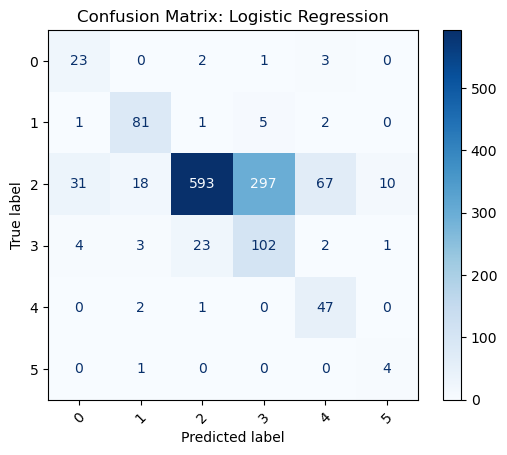


Random Forest
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.95      0.99      0.97        90
           2       0.94      0.96      0.95      1016
           3       0.75      0.74      0.74       135
           4       0.87      0.66      0.75        50
           5       1.00      0.40      0.57         5

    accuracy                           0.92      1325
   macro avg       0.89      0.73      0.78      1325
weighted avg       0.92      0.92      0.92      1325

Balanced Accuracy: 0.7285


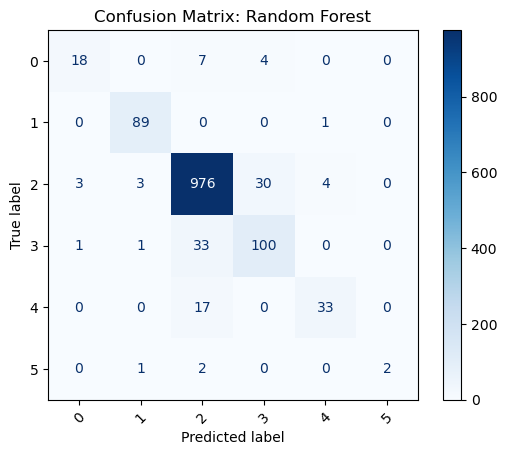


XGBoost


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.97      0.97      0.97        90
           2       0.96      0.97      0.96      1016
           3       0.80      0.80      0.80       135
           4       0.91      0.78      0.84        50
           5       1.00      0.80      0.89         5

    accuracy                           0.94      1325
   macro avg       0.91      0.82      0.86      1325
weighted avg       0.94      0.94      0.94      1325

Balanced Accuracy: 0.8230


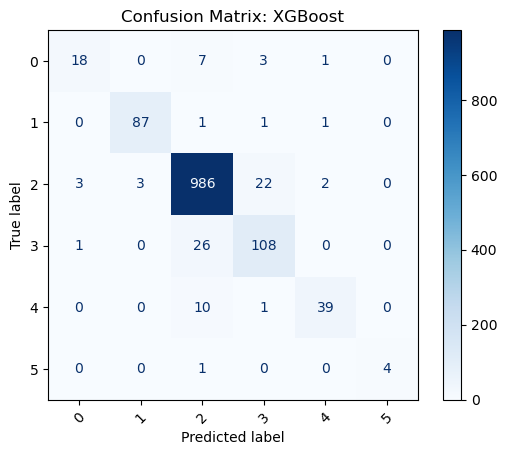


LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 7504, number of used features: 23
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.97      0.99      0.98        90
  

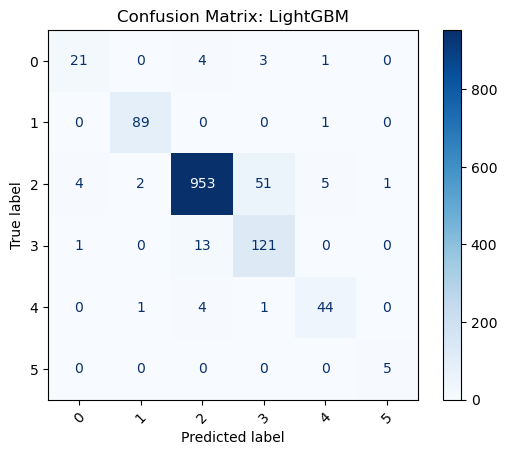


CatBoost
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.96      0.99      0.97        90
           2       0.99      0.91      0.95      1016
           3       0.64      0.92      0.76       135
           4       0.75      0.92      0.83        50
           5       0.83      1.00      0.91         5

    accuracy                           0.92      1325
   macro avg       0.82      0.92      0.87      1325
weighted avg       0.93      0.92      0.92      1325

Balanced Accuracy: 0.9223


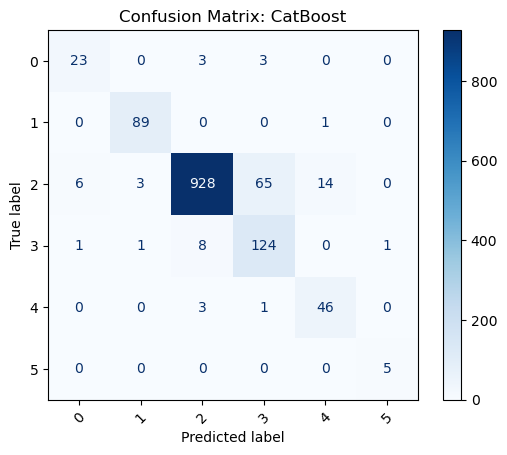


Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        29
           1       0.98      0.98      0.98        90
           2       0.96      0.96      0.96      1016
           3       0.77      0.80      0.79       135
           4       0.87      0.80      0.83        50
           5       0.71      1.00      0.83         5

    accuracy                           0.94      1325
   macro avg       0.86      0.87      0.86      1325
weighted avg       0.94      0.94      0.94      1325

Balanced Accuracy: 0.8663


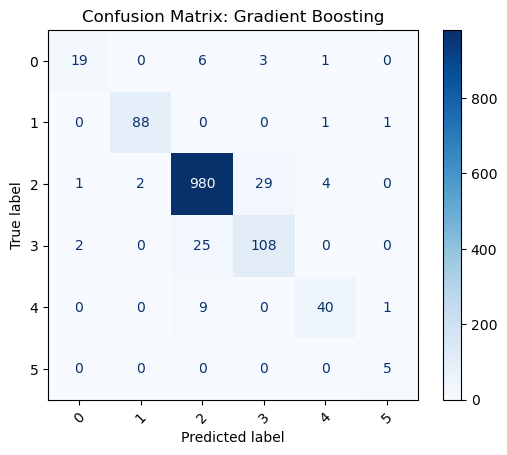


Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.52      0.59        29
           1       0.94      0.98      0.96        90
           2       0.95      0.96      0.95      1016
           3       0.73      0.73      0.73       135
           4       0.83      0.80      0.82        50
           5       0.80      0.80      0.80         5

    accuracy                           0.92      1325
   macro avg       0.82      0.80      0.81      1325
weighted avg       0.92      0.92      0.92      1325

Balanced Accuracy: 0.7961


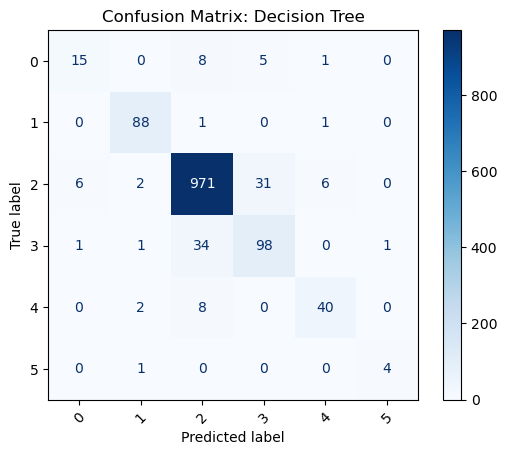


KNN
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        29
           1       0.83      0.42      0.56        90
           2       0.88      0.97      0.92      1016
           3       0.72      0.58      0.64       135
           4       0.87      0.54      0.67        50
           5       0.00      0.00      0.00         5

    accuracy                           0.86      1325
   macro avg       0.67      0.50      0.56      1325
weighted avg       0.85      0.86      0.85      1325

Balanced Accuracy: 0.5040


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


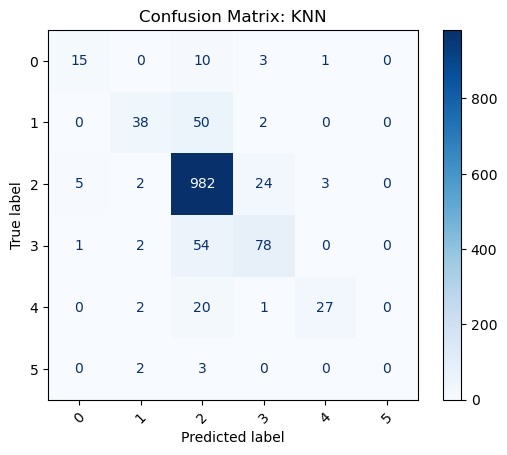


Naive Bayes
              precision    recall  f1-score   support

           0       0.05      0.69      0.09        29
           1       0.50      0.16      0.24        90
           2       0.87      0.12      0.21      1016
           3       0.00      0.00      0.00       135
           4       0.20      0.24      0.22        50
           5       0.01      1.00      0.01         5

    accuracy                           0.13      1325
   macro avg       0.27      0.37      0.13      1325
weighted avg       0.71      0.13      0.18      1325

Balanced Accuracy: 0.3671


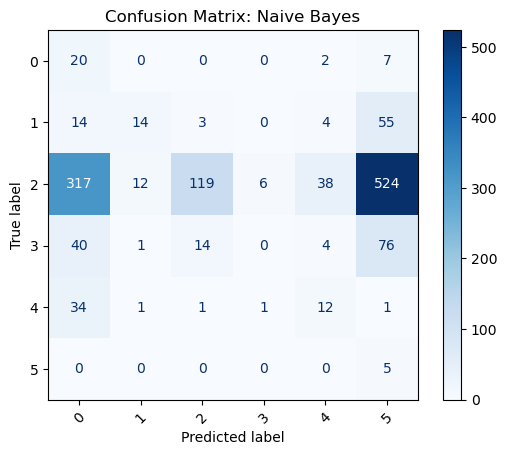


SVM
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        29
           1       0.82      0.89      0.85        90
           2       0.99      0.78      0.87      1016
           3       0.50      0.92      0.65       135
           4       0.36      0.96      0.52        50
           5       0.60      0.60      0.60         5

    accuracy                           0.81      1325
   macro avg       0.64      0.83      0.70      1325
weighted avg       0.89      0.81      0.83      1325

Balanced Accuracy: 0.8343


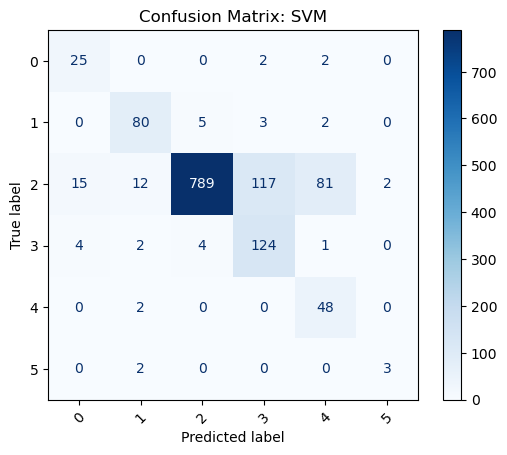

In [116]:
# Fiting and evaluating all models with classification report, balanced accuracy, and confusion matrix plot
for name, model in models.items():
    print(f"\n{name}")
    
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy: {bal_acc:.4f}")

    # Confusion matrix and plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, 'classes_') else None)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()



Logistic Regression


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


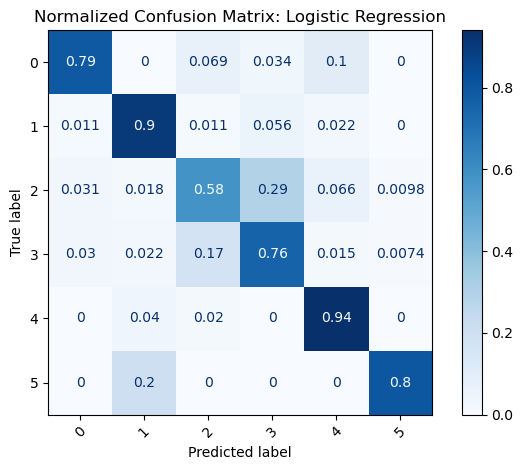


Random Forest


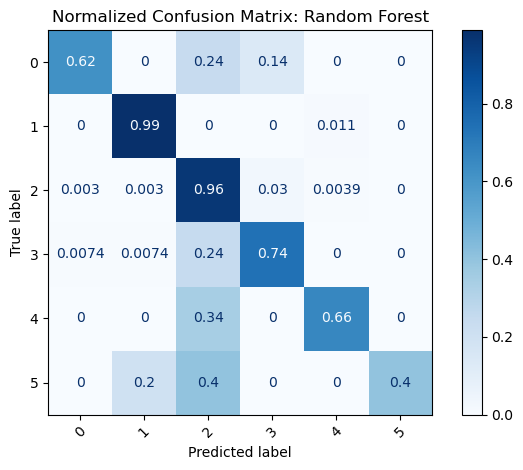


XGBoost


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


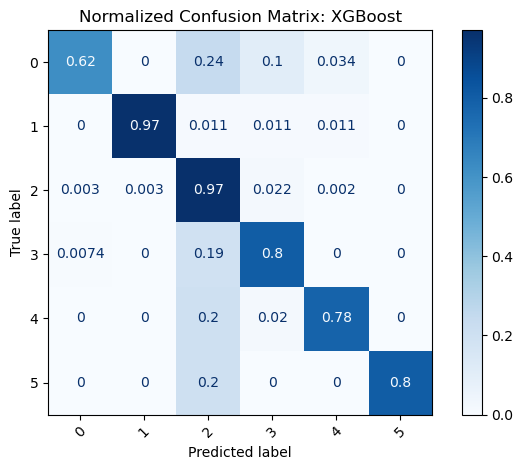


LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 7504, number of used features: 23
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


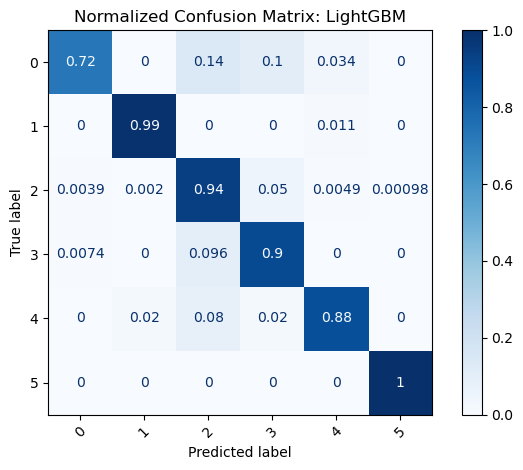


CatBoost


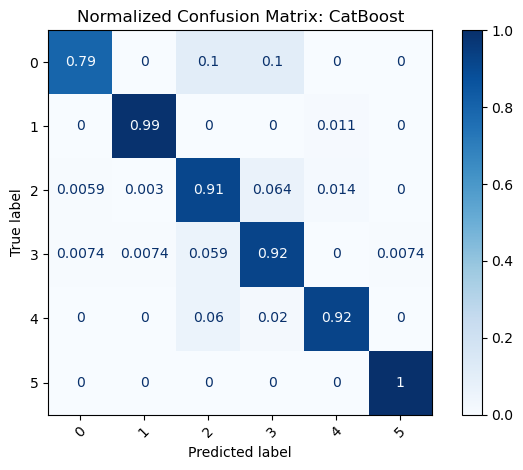


Gradient Boosting


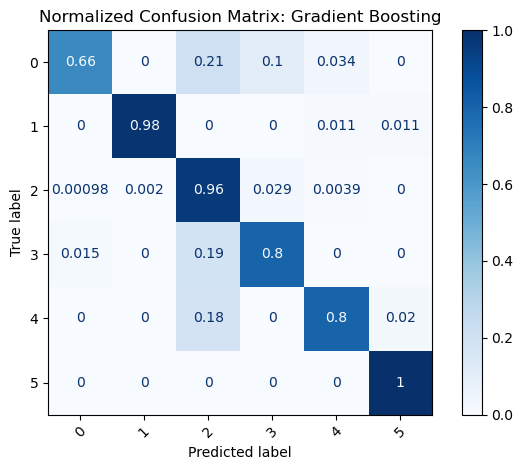


Decision Tree


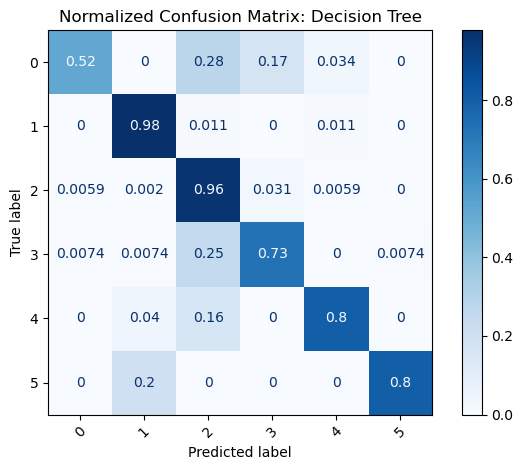


KNN


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


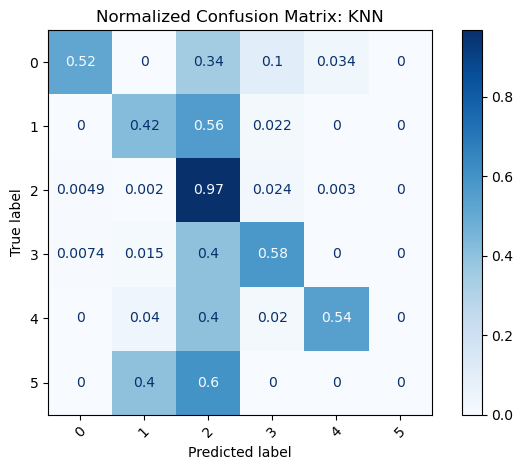


Naive Bayes


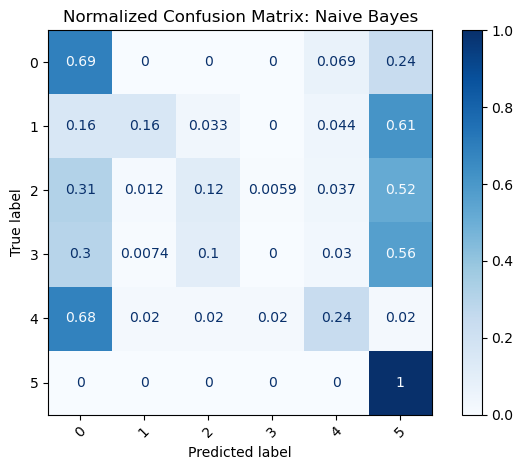


SVM


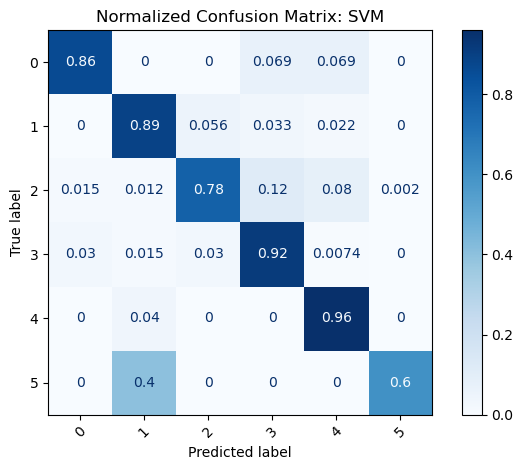


Model Comparison Table (sorted by Balanced Accuracy):
                 Model  Balanced Accuracy  Macro F1  Macro Precision  \
3             LightGBM           0.904553  0.876327         0.856184   
4             CatBoost           0.922316  0.865710         0.823119   
2              XGBoost           0.822971  0.860585         0.908030   
5    Gradient Boosting           0.866253  0.856278         0.859580   
6        Decision Tree           0.796109  0.807101         0.822127   
1        Random Forest           0.728492  0.781655         0.887113   
9                  SVM           0.834342  0.696426         0.639251   
0  Logistic Regression           0.795387  0.567653         0.504110   
7                  KNN           0.503963  0.564562         0.668522   
8          Naive Bayes           0.367056  0.127475         0.270526   

   Macro Recall  AUC-PR (micro)  
3      0.904553        0.986127  
4      0.922316        0.977055  
2      0.822971        0.987930  
5      0.866253 

In [117]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

results = []

# Convert y_test to a pandas Series if it's a numpy array
y_test_series = pd.Series(y_test)

# Binarize labels for AUC-PR (only for multiclass)
classes = np.unique(y_test)  # Use np.unique instead of unique() for ndarray
y_test_bin = label_binarize(y_test, classes=classes)

for name, model in models.items():
    print(f"\n{name}")
    
    # For AUC-PR we need probability estimates, so wrap with OneVsRest if needed
    if hasattr(model, "predict_proba"):
        model_bin = model
    else:
        model_bin = OneVsRestClassifier(model)

    model_bin.fit(X_train, y_train)
    y_pred = model_bin.predict(X_test)
    
    # Predict probabilities for AUC-PR (multiclass)
    if hasattr(model_bin, "predict_proba"):
        y_score = model_bin.predict_proba(X_test)
        auc_pr = average_precision_score(y_test_bin, y_score, average='micro')
    else:
        auc_pr = None

    # Compute metrics
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')

    # Store results
    results.append({
        'Model': name,
        'Balanced Accuracy': bal_acc,
        'Macro F1': f1_macro,
        'Macro Precision': precision_macro,
        'Macro Recall': recall_macro,
        'AUC-PR (micro)': auc_pr
    })

    # Plot normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"Normalized Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()

# Results as DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['Macro F1', 'Balanced Accuracy'], ascending=[False, False])

print("\nModel Comparison Table (sorted by Balanced Accuracy):")
print(results_df)


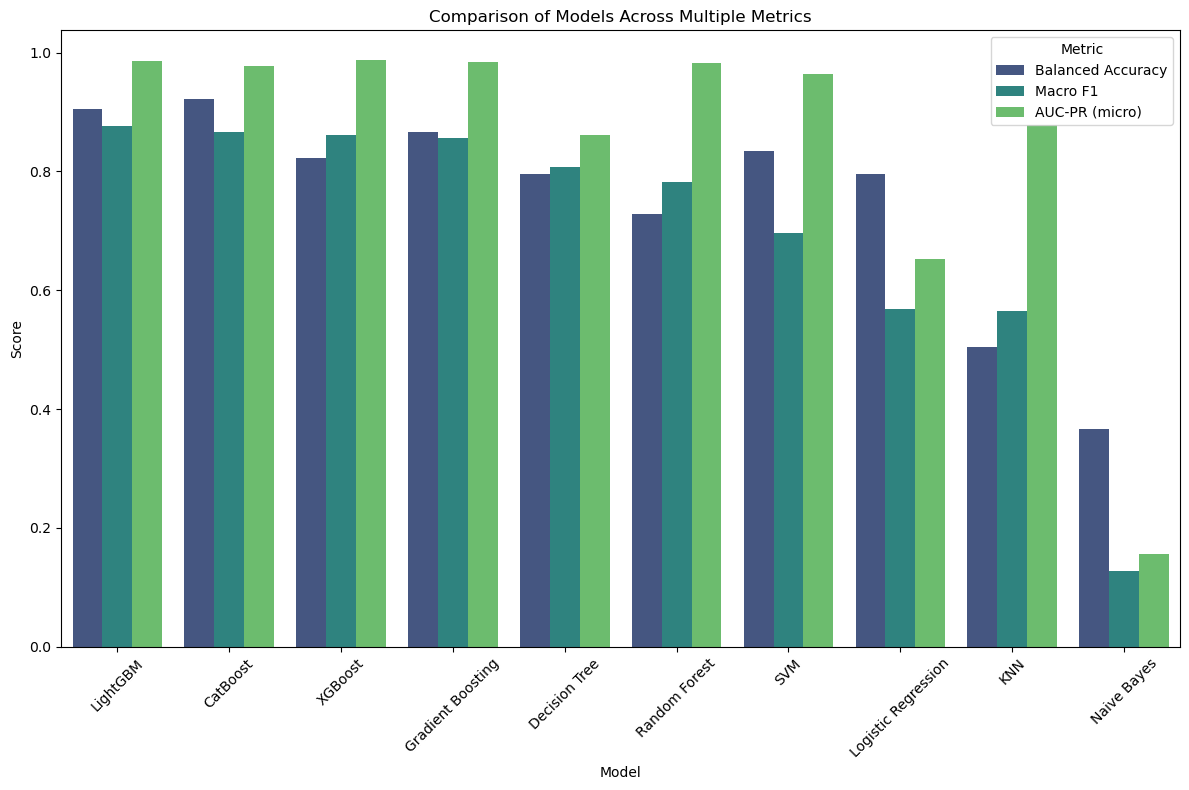

In [118]:
# Melt the DataFrame to long format for grouped bar plot
metrics_columns = ['Balanced Accuracy', 'Macro F1', 'AUC-PR (micro)']
results_df_melted = results_df.melt(id_vars='Model', value_vars=metrics_columns, 
                                    var_name='Metric', value_name='Score')

# Grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted, palette='viridis')
plt.title('Comparison of Models Across Multiple Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpreteation of the baseline models and model selection. 

Plotting feature importance for each model

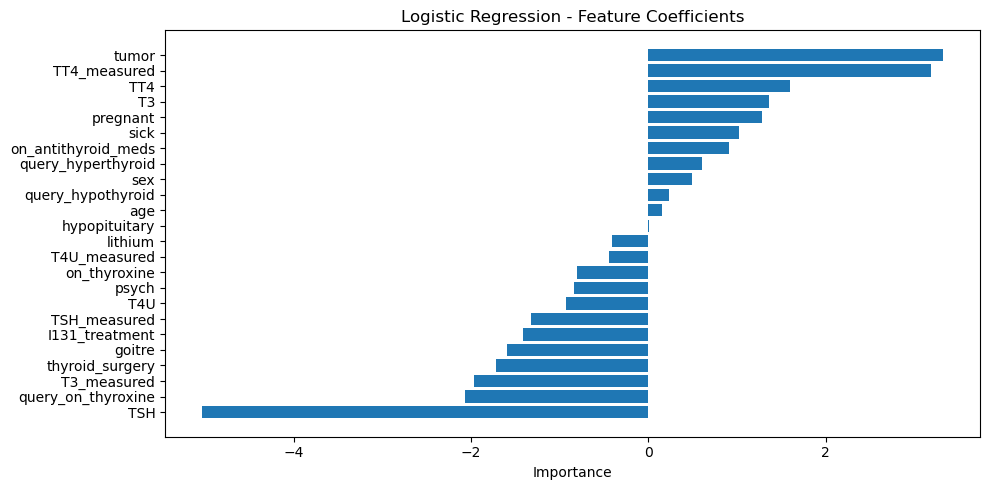

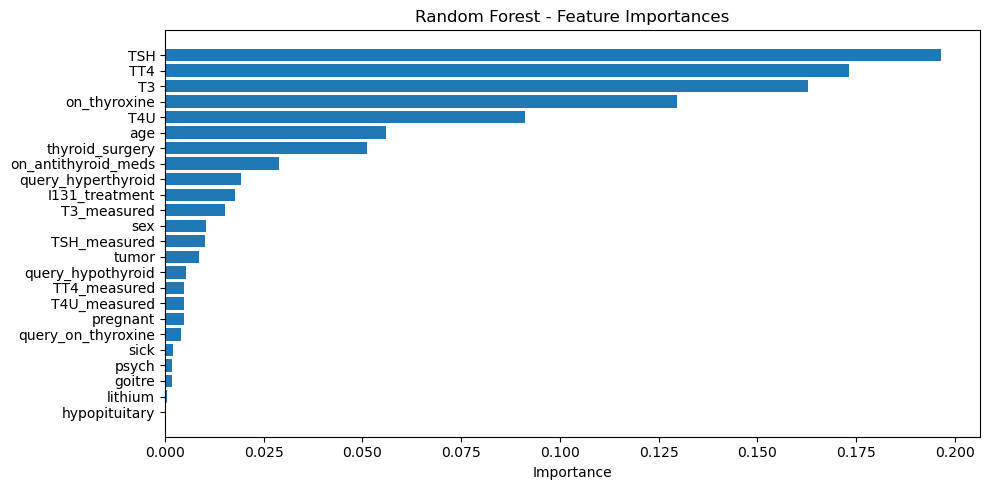

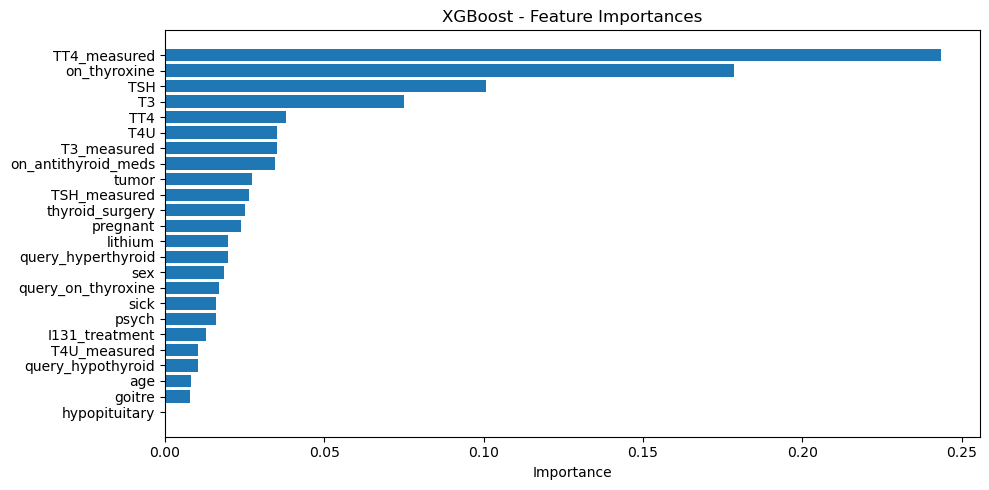

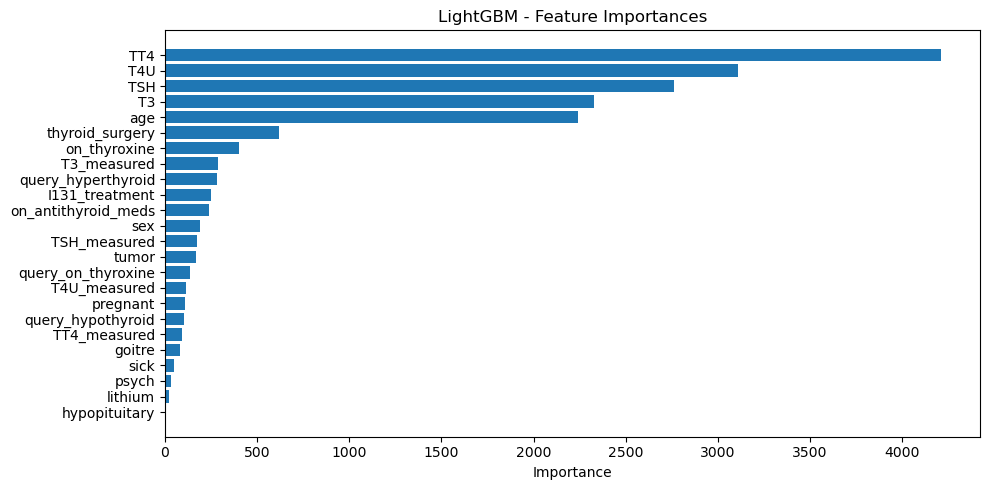

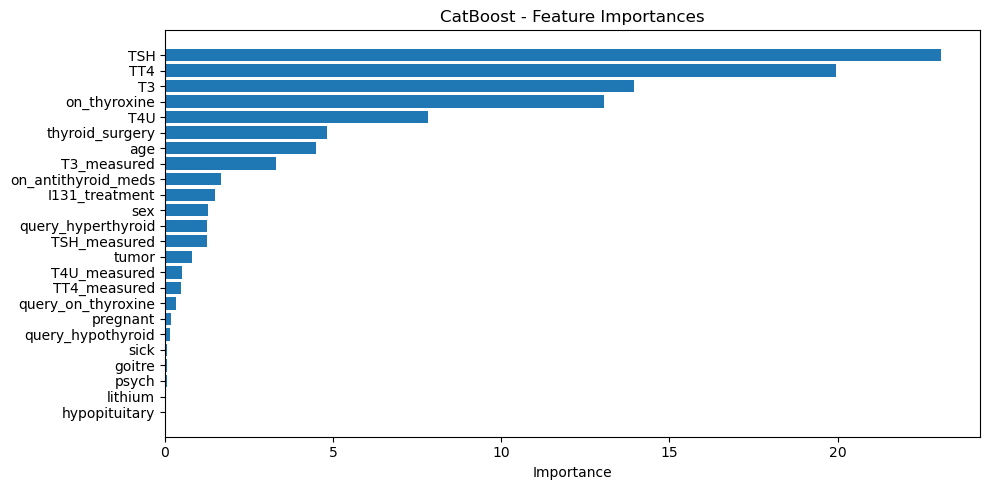

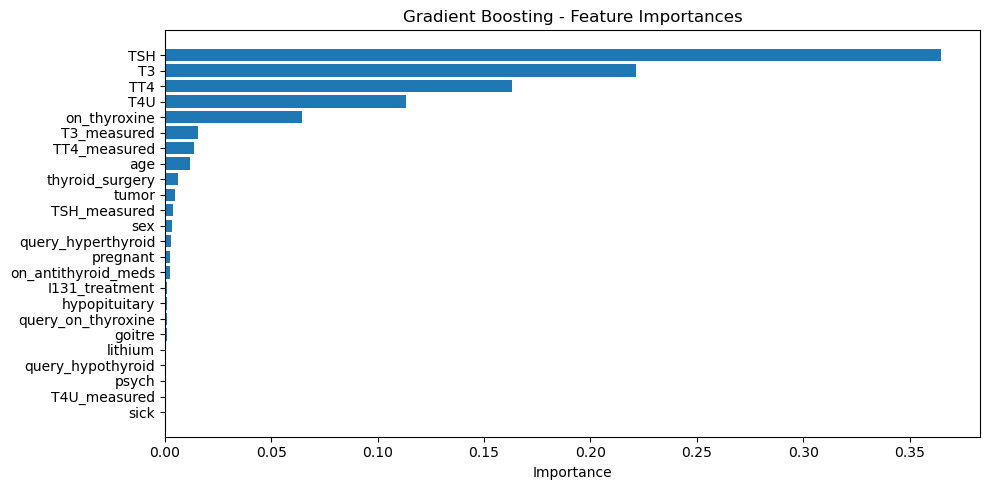

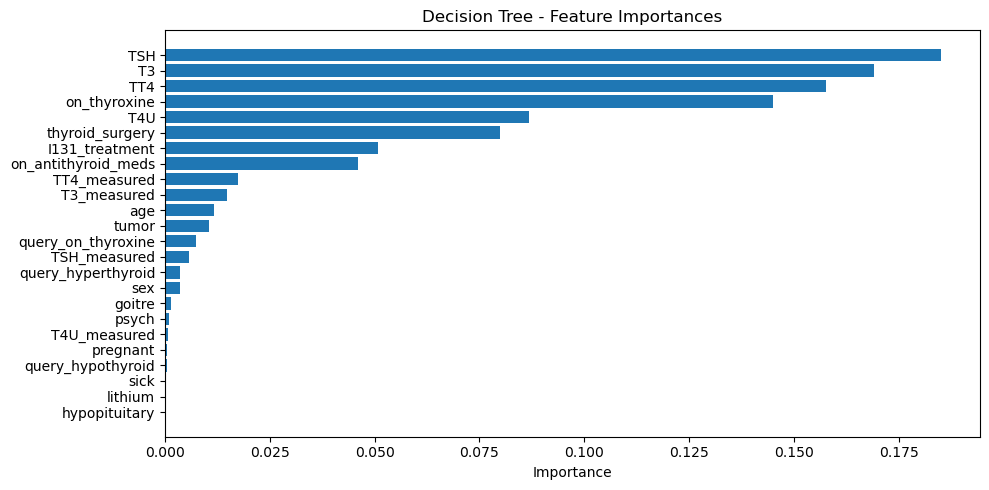

In [121]:
for name, model in models.items():
    try:
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            title = "Feature Importances"
        elif hasattr(model, "coef_"):
            importances = model.coef_[0]  
            title = "Feature Coefficients"
        else:
            continue
    
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        }).sort_values(by='importance', ascending=False)
    
        plt.figure(figsize=(10, 5))
        plt.barh(importance_df['feature'], importance_df['importance'])
        plt.xlabel("Importance")
        plt.title(f"{name} - {title}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Could not plot feature importance for {name}: {e}")


# Data Modelling

## Random Forest Classifier

In [124]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced'] 
}

# Set up Stratified K-Fold (5 splits for robustness)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV (use 'f1_macro' for imbalanced classes)
grid_search = GridSearchCV(estimator=rf, 
                          param_grid=param_grid,
                          cv=cv, 
                          scoring='f1_macro', 
                          verbose=1, 
                          n_jobs=-1)

# Fit the model (on TRAIN data only)
grid_search.fit(X_train, y_train)

# Best parameters and CV score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)

# Predict on TEST set using the best estimator
best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score (for multi-class)
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validated f1_macro: 0.7947746824263534

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.95      0.98      0.96        90
           2       0.96      0.95      0.96      1016
           3       0.71      0.83      0.77       135
           4       0.83      0.80      0.82        50
           5       1.00      0.60      0.75         5

    accuracy                           0.93      1325
   macro avg       0.89      0.83      0.85      1325
weighted avg       0.93      0.93      0.93      1325


Balanced Accuracy: 0.8301
Macro F1-Score: 0.8488


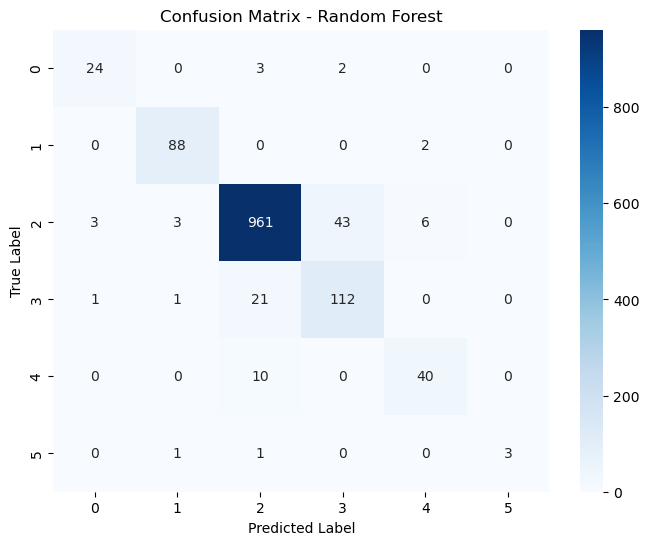

In [125]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## XGBoost Classifier

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=1; total time=   0.7s
[CV] END colsample_b

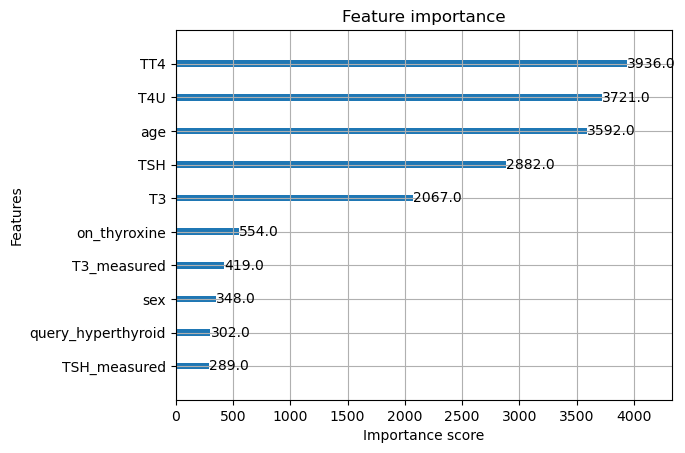

In [127]:
# Initialize classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # Use 'softmax' for class labels (not probabilities)
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    tree_method='hist',  
    random_state=42,
    early_stopping_rounds=10  # Add early stopping
)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1],  # Added for regularization
    'reg_alpha': [0, 0.1],  # L1 regularization
    'reg_lambda': [0, 0.1]  # L2 regularization
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    verbose=2,  # More detailed output
    n_jobs=-1,
    refit=True  # Refit the best model on the entire training set
)

# Fit the model (with early stopping validation set)
grid_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Early stopping on test set
    verbose=False
)

# Best model and predictions
best_xgb = grid_search.best_estimator_
y_pred_test = best_xgb.predict(X_test)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

# Feature Importance
xgb.plot_importance(best_xgb, max_num_features=10)
plt.show()

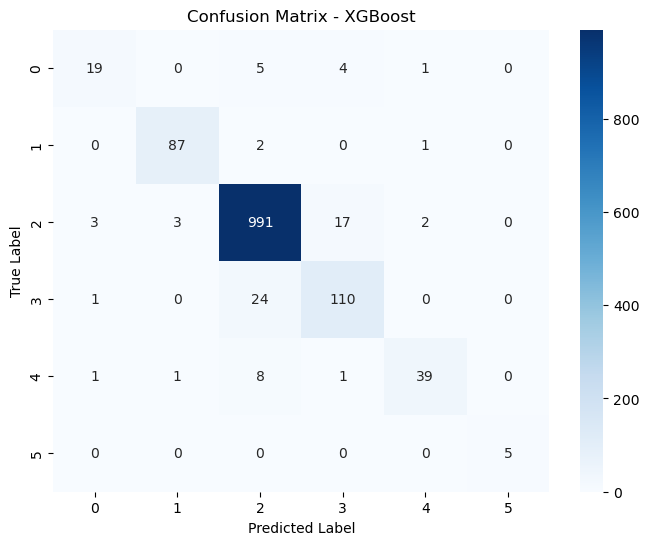

In [128]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

with smote 

In [130]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

#Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Resample only the training set, not test/validation
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Define the XGBoost model 
xgb_model = XGBClassifier(
    objective='multi:softmax', 
    eval_metric='mlogloss',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [6, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Set up Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with weighted f1 score
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)

# Evaluate on test set
y_pred_test = grid_search.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Class distribution before SMOTE: Counter({2: 5751, 3: 762, 1: 511, 4: 286, 0: 166, 5: 28})
Class distribution after SMOTE: Counter({0: 5751, 2: 5751, 3: 5751, 1: 5751, 4: 5751, 5: 5751})
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}
Best Cross-Validated f1_macro: 0.9843532978788284

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.95      0.97      0.96        90
           2       0.98      0.94      0.96      1016
           3       0.71      0.85      0.77       135
           4       0.88      0.90      0.89        50
           5       0.67      0.80      0.73         5

    accuracy                           0.93      1325
   macro avg       0.82      0.88      0.84      1325
weighted avg       0.94      0.93      0.93      1325



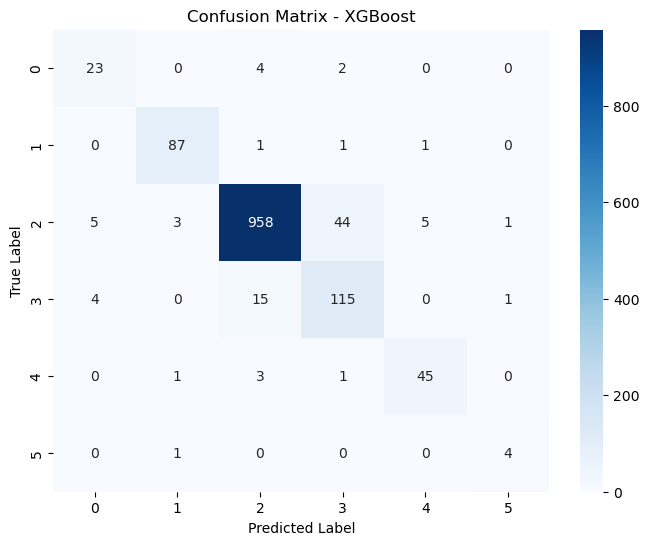

In [131]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## LightGBM


In [133]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Define hyperparameter distributions
param_dist_lgbm = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}


# RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_dist_lgbm,
                                        n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42)

# Fit the model
random_search_lgbm.fit(X_train, y_train)

# Results
print("Best Parameters for LightGBM from RandomizedSearchCV:", random_search_lgbm.best_params_)
print("Best Cross-Validated f1_macro for LightGBM:", random_search_lgbm.best_score_)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 5002, number of used features: 23
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

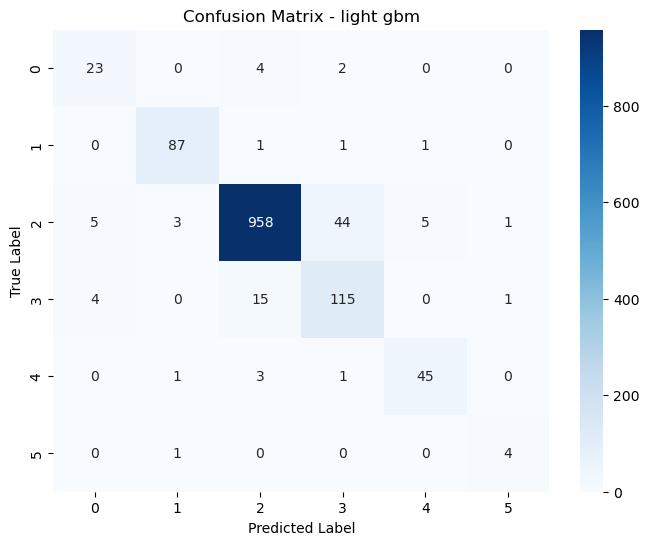

In [134]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - light gbm')
plt.show()

# CatBoost 

In [136]:
from catboost import CatBoostClassifier


# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass', cat_features=None, thread_count=-1, verbose=0)

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 10, 15],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [0, 0.1, 1],
    'max_ctr_complexity': [1, 2, 3]
}

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Retrain the model with the best parameters
best_model = random_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'random_strength': 1, 'max_ctr_complexity': 3, 'learning_rate': 0.1, 'l2_leaf_reg': 15, 'iterations': 2000, 'depth': 6, 'border_count': 100, 'bagging_temperature': 0}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.95      0.97      0.96        90
           2       0.98      0.94      0.96      1016
           3       0.71      0.85      0.77       135
           4       0.88      0.90      0.89        50
           5       0.67      0.80      0.73         5

    accuracy                           0.93      1325
   macro avg       0.82      0.88      0.84      1325
weighted avg       0.94      0.93      0.93      1325


Balanced Accuracy: 0.8758
Macro F1-Score: 0.8433


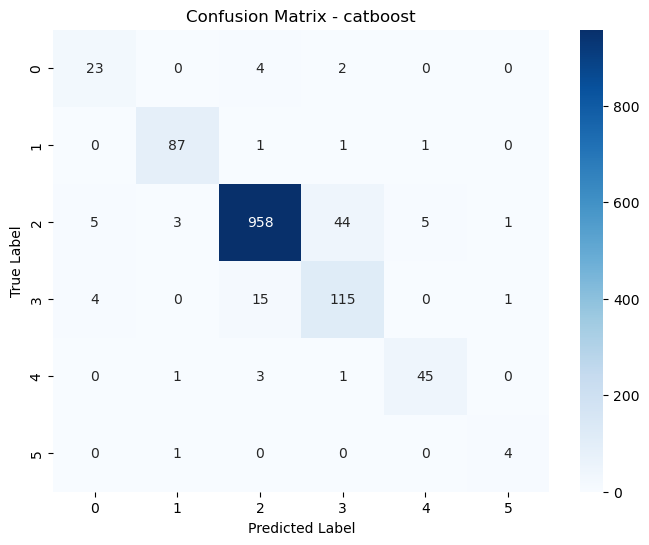

In [137]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - catboost')
plt.show()

# Decision tree 

In [139]:
# 3. Define the model and hyperparameter grid
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

# 4. GridSearchCV
grid_search = GridSearchCV(dt, param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)

# 5. Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}
Best Cross-Validated f1_macro: 0.9740551567107298

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.95      0.97      0.96        90
           2       0.98      0.94      0.96      1016
           3       0.71      0.85      0.77       135
           4       0.88      0.90      0.89        50
           5       0.67      0.80      0.73         5

    accuracy                           0.93      1325
   macro avg       0.82      0.88      0.84      1325
weighted avg       0.94      0.93      0.93      1325


Balanced Accuracy: 0.8758
Macro F1-Score: 0.8433


# SVM 

In [141]:
from sklearn.pipeline import Pipeline

# 3. Build a pipeline with scaler + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# 4. Define hyperparameter grid for SVC
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
    'svm__class_weight': [ 'balanced']
}

# 5. GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# 6. Best model and evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'svm__C': 10, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validated f1_macro: 0.9360819896410193

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.95      0.97      0.96        90
           2       0.98      0.94      0.96      1016
           3       0.71      0.85      0.77       135
           4       0.88      0.90      0.89        50
           5       0.67      0.80      0.73         5

    accuracy                           0.93      1325
   macro avg       0.82      0.88      0.84      1325
weighted avg       0.94      0.93      0.93      1325


Balanced Accuracy: 0.8758
Macro F1-Score: 0.8433


In [232]:
class_map = {
    0: "Hyperthyroid",
    1: "Hypothyroid",
    2: "Negative",
    3: "Non-thyroidal Illness",
    4: "Replacement Therapy",
    5: "Treatment Effect"
}
df['target_label'] = df['target'].map(class_map)


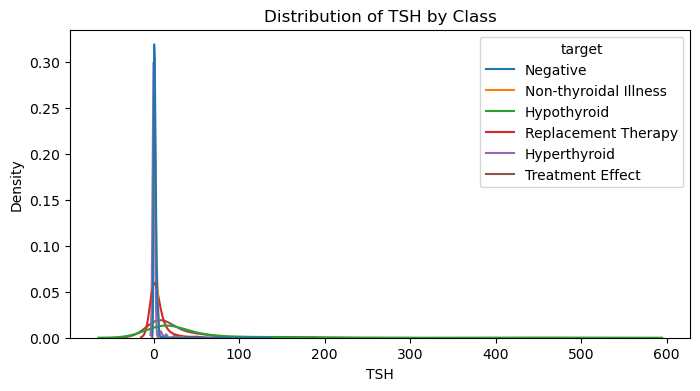

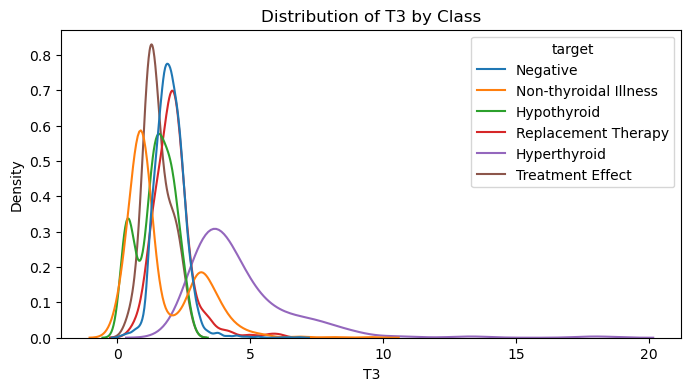

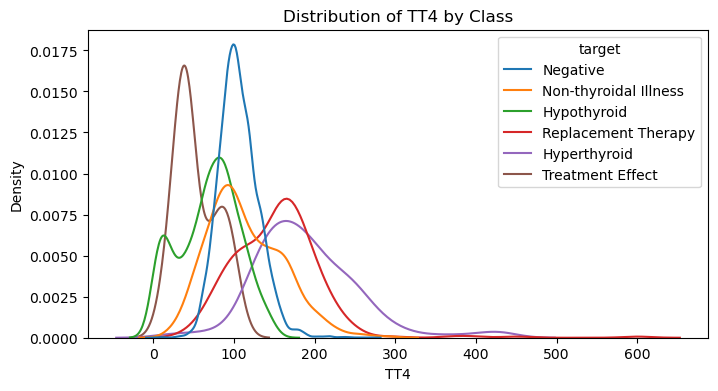

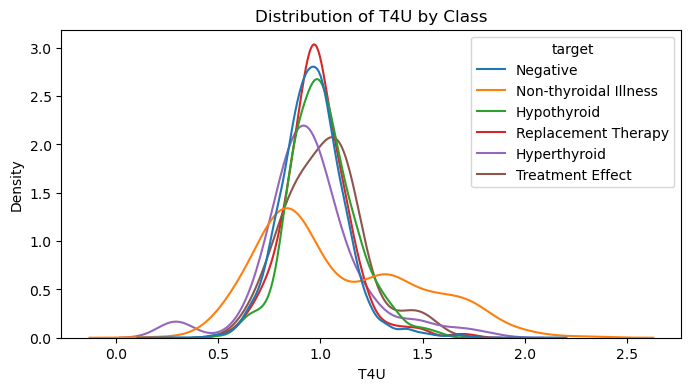

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['TSH', 'T3', 'TT4', 'T4U'] 

for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue='target', common_norm=False)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()
